# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/Computer Vision/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [7]:
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

**Observations:**

- Total number of plant seedling types are 12
- We have a total of 4750 plant images, with label as the plant name
- Each image is of shape 128 X 128
- Number of channels is 3

## Exploratory Data Analysis

### Visualizing a sampling of all the 12 types of plant seedlings

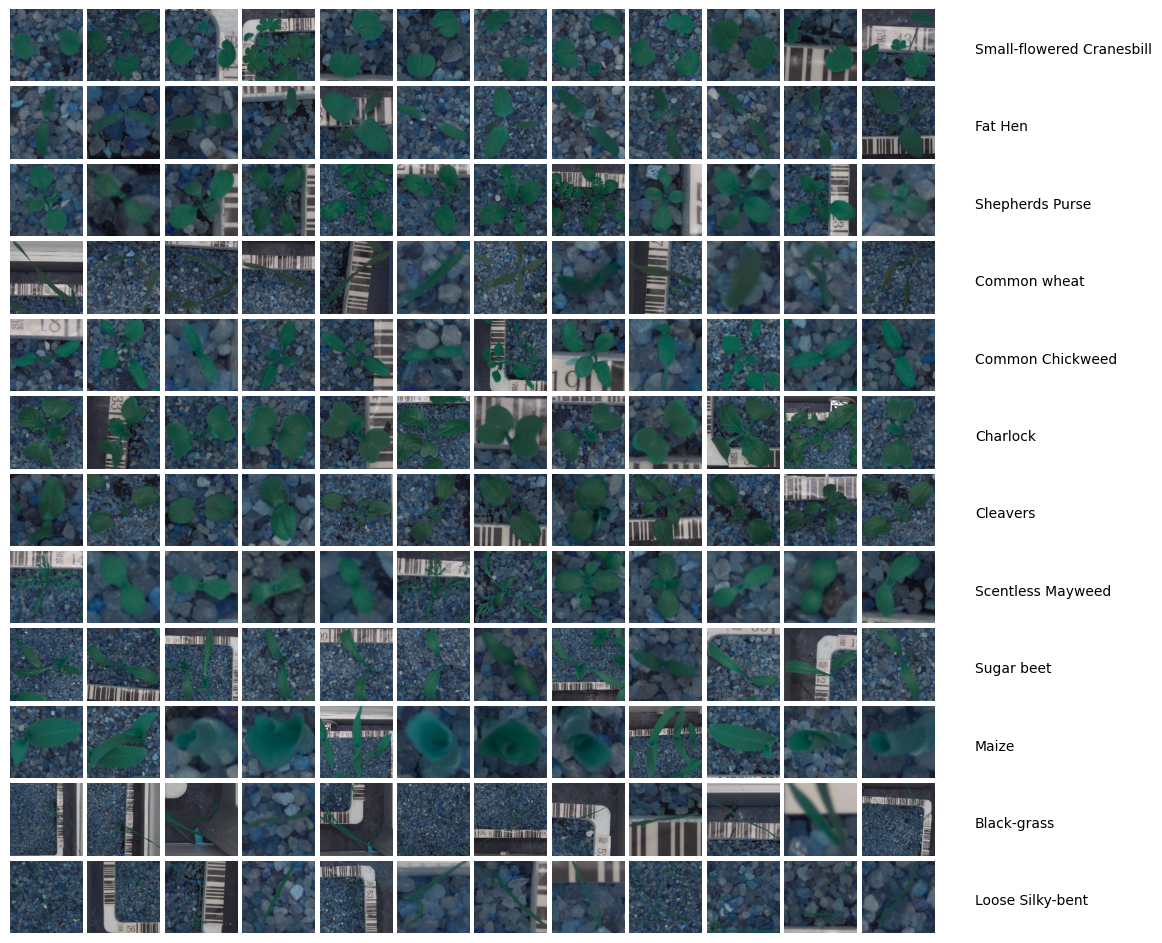

In [7]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid
#defining a figure of size 12X12
num_categ=12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(labels.Label.unique()):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

**Observations**
- We can start to see some visual distinctions among the 12 plant types.
- Some have round shaped leaves like Charlock and Small-flowered Cranesbill, others have elongated but rounded leaves like Fat Hen and Common Chickweed, yet others have pointy straight leaves like Black-grass and Loose Silky-bent.
- Some have leaves in pairs of 2 or 3 like Scentless Mayweed, others don't like Maize.
- Maize can show a unique curling of the leaves.

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

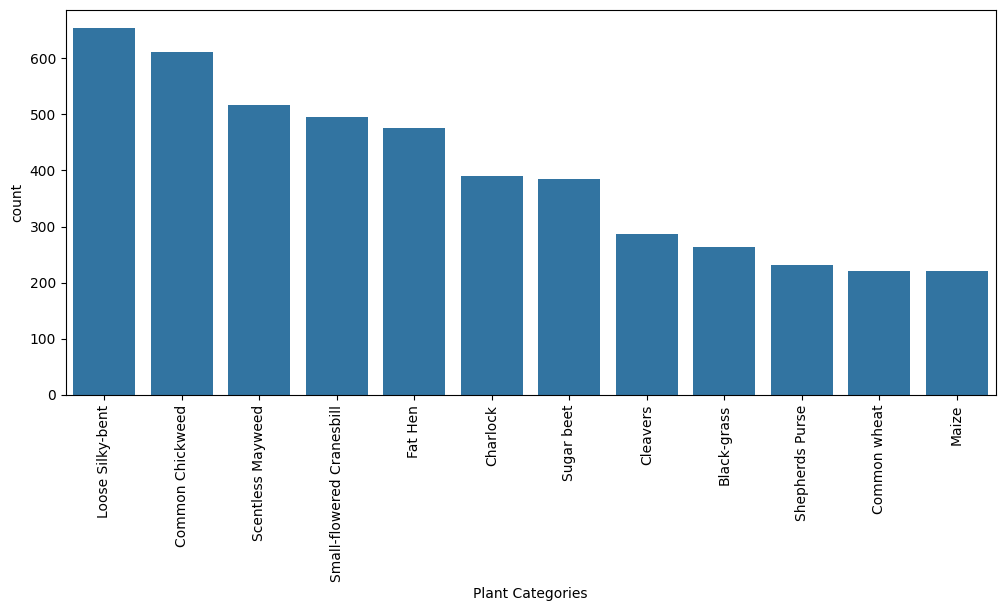

In [8]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'].value_counts().index)
plt.xlabel('Plant Categories')
plt.xticks(rotation=90)

**Observations**
- As we can see from this plot, the dataset is imbalanced.
- There are 600+ images of the Loose Silky-bent plant on the highest end, compared t0 200 each for Common Wheat and Maize on the lower end.

## Data Pre-Processing

### Convert the BGR images to RGB images.

From the visualization before, the plant images seemed to be in the BGR channel which is the default channel for image processing. Let's convert it to RGB.

In [10]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

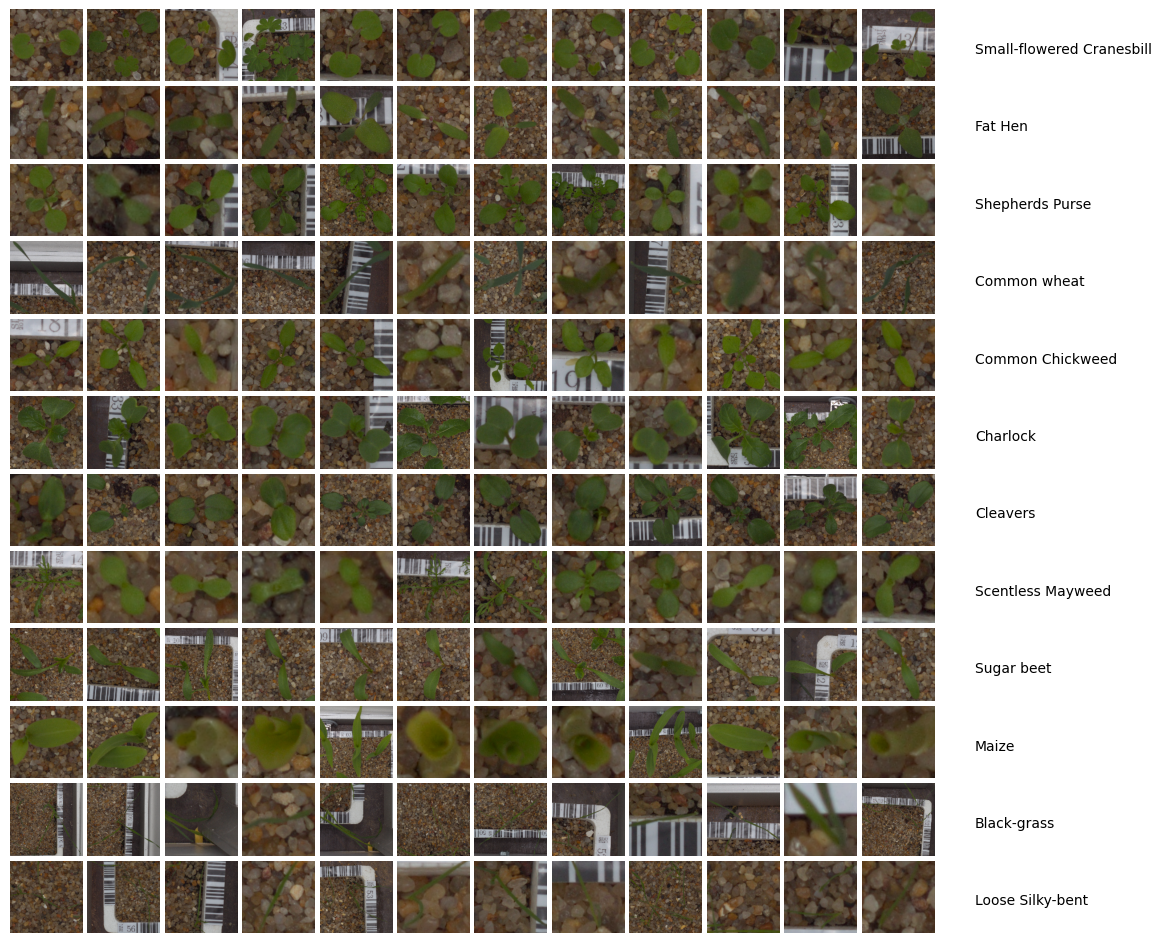

In [12]:
#defining a figure of size 12X12
num_categ=12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(labels.Label.unique()):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Image sample before resizing

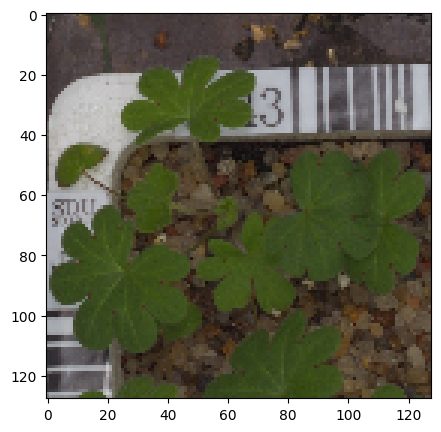

In [15]:
plt.imshow(images[3])

Image sample after resizing

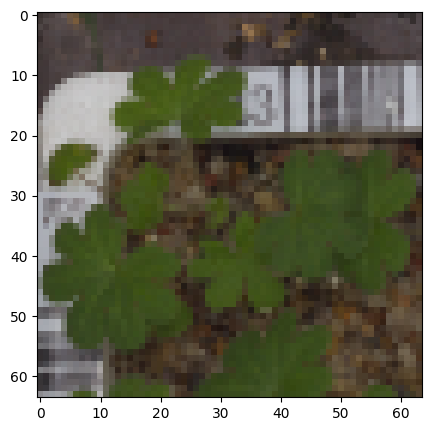

In [16]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

**Split the dataset in train, validation and test sets**

In [17]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [18]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


#### Encode the target labels

Our labels dataset is a column of text which our CNN won't be able to process as is. We will use LabelBinarizer to do one-hot encoding of the label texts for a 12 neuron output.



In [19]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [20]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

In [22]:
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

#### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [23]:
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Since the business wants to save time and energy required to correctly identify plant seedlings, we will optimize for the accuracy metric.

In [25]:
# Clearing backend
backend.clear_session()

In [26]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [27]:
# Intializing a sequential model
model1 = Sequential()                             # Initialize a sequential model

# Adding the first conv layer with kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())
# Add a fully connected dense layers
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
# Add the output layer with activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Use the Adam Optimizer
opt=Adam()
# Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

We have a total of 319308 trainable parameters in this neural network.

**Fitting the model on the training data**

In [28]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 7s - loss: 2.4047 - accuracy: 0.1632 - val_loss: 2.1151 - val_accuracy: 0.2967 - 7s/epoch - 60ms/step
Epoch 2/30
121/121 - 1s - loss: 1.9585 - accuracy: 0.3213 - val_loss: 1.6800 - val_accuracy: 0.3949 - 689ms/epoch - 6ms/step
Epoch 3/30
121/121 - 1s - loss: 1.7416 - accuracy: 0.3923 - val_loss: 1.5233 - val_accuracy: 0.4439 - 914ms/epoch - 8ms/step
Epoch 4/30
121/121 - 1s - loss: 1.5976 - accuracy: 0.4253 - val_loss: 1.3762 - val_accuracy: 0.5210 - 812ms/epoch - 7ms/step
Epoch 5/30
121/121 - 1s - loss: 1.4836 - accuracy: 0.4653 - val_loss: 1.3311 - val_accuracy: 0.5748 - 846ms/epoch - 7ms/step
Epoch 6/30
121/121 - 1s - loss: 1.3837 - accuracy: 0.5061 - val_loss: 1.2293 - val_accuracy: 0.6168 - 733ms/epoch - 6ms/step
Epoch 7/30
121/121 - 1s - loss: 1.2866 - accuracy: 0.5350 - val_loss: 1.1759 - val_accuracy: 0.5888 - 676ms/epoch - 6ms/step
Epoch 8/30
121/121 - 1s - loss: 1.2221 - accuracy: 0.5654 - val_loss: 1.1821 - val_accuracy: 0.6098 - 676ms/epoch - 6ms/step
Ep

**Model Evaluation**

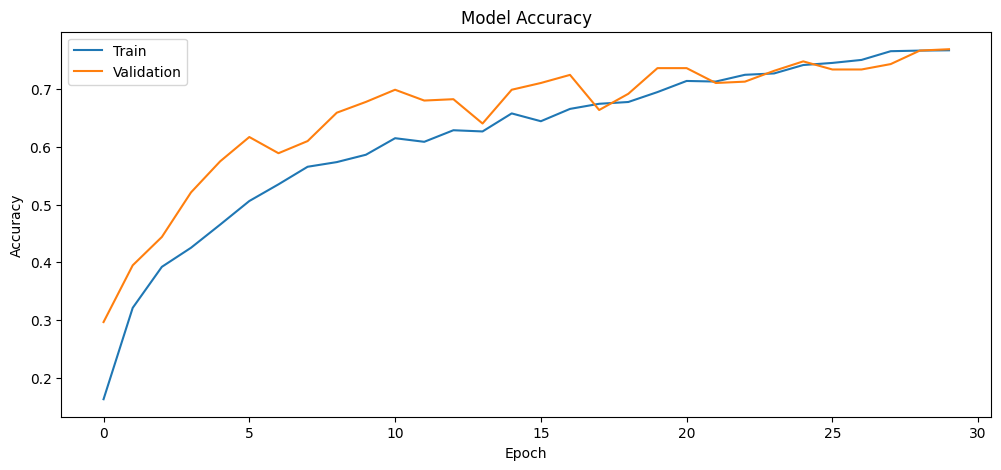

In [29]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model has performed well, with both training and validation accuracy converging at 76%.

**Evaluate test performance**

In [30]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8211 - accuracy: 0.7811 - 265ms/epoch - 18ms/step


Test accuracy is slightly higher at 78%.

**Plotting the Confusion Matrix**

In [31]:
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


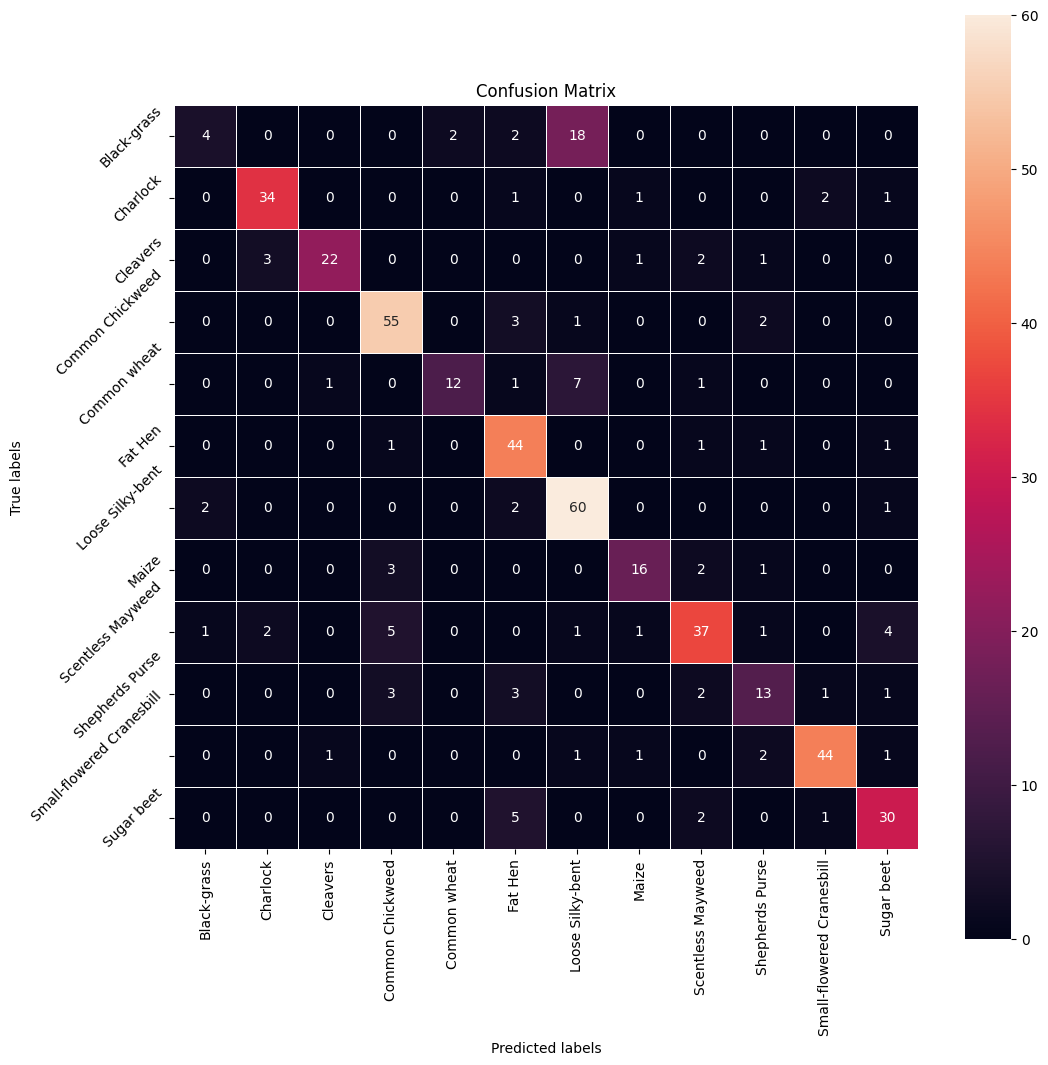

In [32]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=45)
plt.show()

As we can see from the confusion matrix, there are many mis-classifications happening, especially among Loose Silky-bent, Common wheat and Black Grass. Also between Scentless Mayweed and Common Chickweed, and Fat Hen and Sugar beet.

**Print Classification Report**

In [33]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
print(classification_report(y_test_arg, y_pred_arg, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.57      0.15      0.24        26
                 Charlock       0.87      0.87      0.87        39
                 Cleavers       0.92      0.76      0.83        29
         Common Chickweed       0.82      0.90      0.86        61
             Common wheat       0.86      0.55      0.67        22
                  Fat Hen       0.72      0.92      0.81        48
         Loose Silky-bent       0.68      0.92      0.78        65
                    Maize       0.80      0.73      0.76        22
        Scentless Mayweed       0.79      0.71      0.75        52
          Shepherds Purse       0.62      0.57      0.59        23
Small-flowered Cranesbill       0.92      0.88      0.90        50
               Sugar beet       0.77      0.79      0.78        38

                 accuracy                           0.78       475
                macro avg       0.78      0.73      0.74    

We can see from the classification report that the accuracy is 0.78 and the weighted average F1 score for our base model is 0.77. The precision, recall and f1 scores are lowest for Black Grass which might be because we have less images of this seedling compared to others. Common wheat and Shepherd's purse also have low recall scores.

We will now attempt to improve the model performance by adapting the learning rate to reduce loss and by using image data generator to handle the imbalance in the dataset.

## Model Performance Improvement

**Reducing the Learning Rate:**

We will use **ReduceLRonPlateau()** function to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [34]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [35]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Data Augmentation**

We've seen that the dataset is imbalanced and it is probably contributing to the mis-classifications as the model overfits on more frequent categories than others. We will use ImageDataGenerator which randomly changes the characteristics of images and provides randomness in the data. Here we are rotating the images and filling the resultant blank pixels with nearest pixel values.

In [36]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [37]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(64, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

We have total 319436 trainable parameters in this model, slighly more than our base model.

**Fitting the model on the training data**

In [38]:
#fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 8s 95ms/step - loss: 1.9140 - accuracy: 0.3347 - val_loss: 2.3869 - val_accuracy: 0.1939 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 4s 70ms/step - loss: 1.2919 - accuracy: 0.5467 - val_loss: 2.2439 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 6s 95ms/step - loss: 1.0094 - accuracy: 0.6508 - val_loss: 2.1656 - val_accuracy: 0.3294 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 5s 87ms/step - loss: 0.8431 - accuracy: 0.7150 - val_loss: 1.8200 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 5s 77ms/step - loss: 0.7448 - accuracy: 0.7399 - val_loss: 1.5615 - val_accuracy: 0.5888 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 4s 72ms/step - loss: 0.7063 - accuracy: 0.7515 - val_loss: 1.3644 - val_accuracy: 0.5794 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 6s 94ms/step - loss: 0.6

**Model Evaluation**

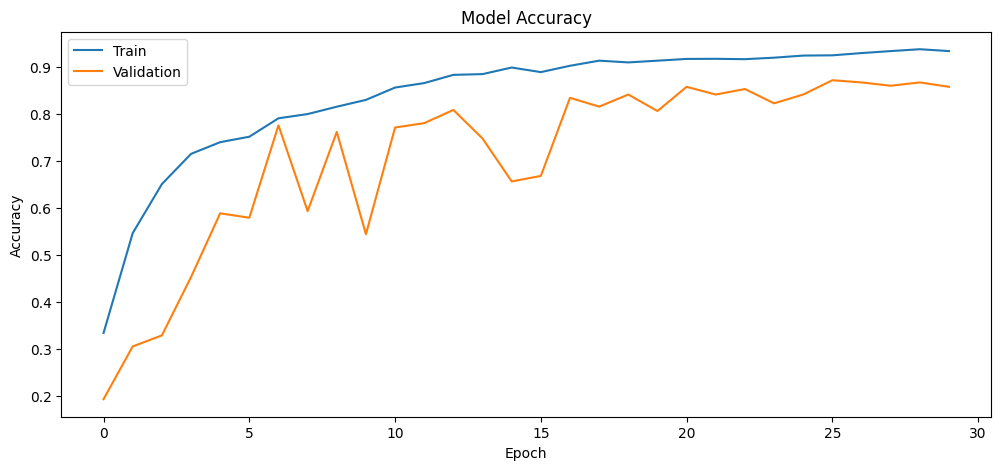

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can see that there was some noise in the validation accuracy initially but eventually the model has trained and performed well on both training and validation sets. Accuracy has now jumped to 93% on training set and 86% on validation set, from 76% with our base model 1.

**Evaluate test performance**

In [40]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5505 - accuracy: 0.8463 - 67ms/epoch - 4ms/step


Accuracy on test set has also improved to 85% from 78% with model 1.

**Plotting the Confusion Matrix**

In [41]:
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 9ms/step


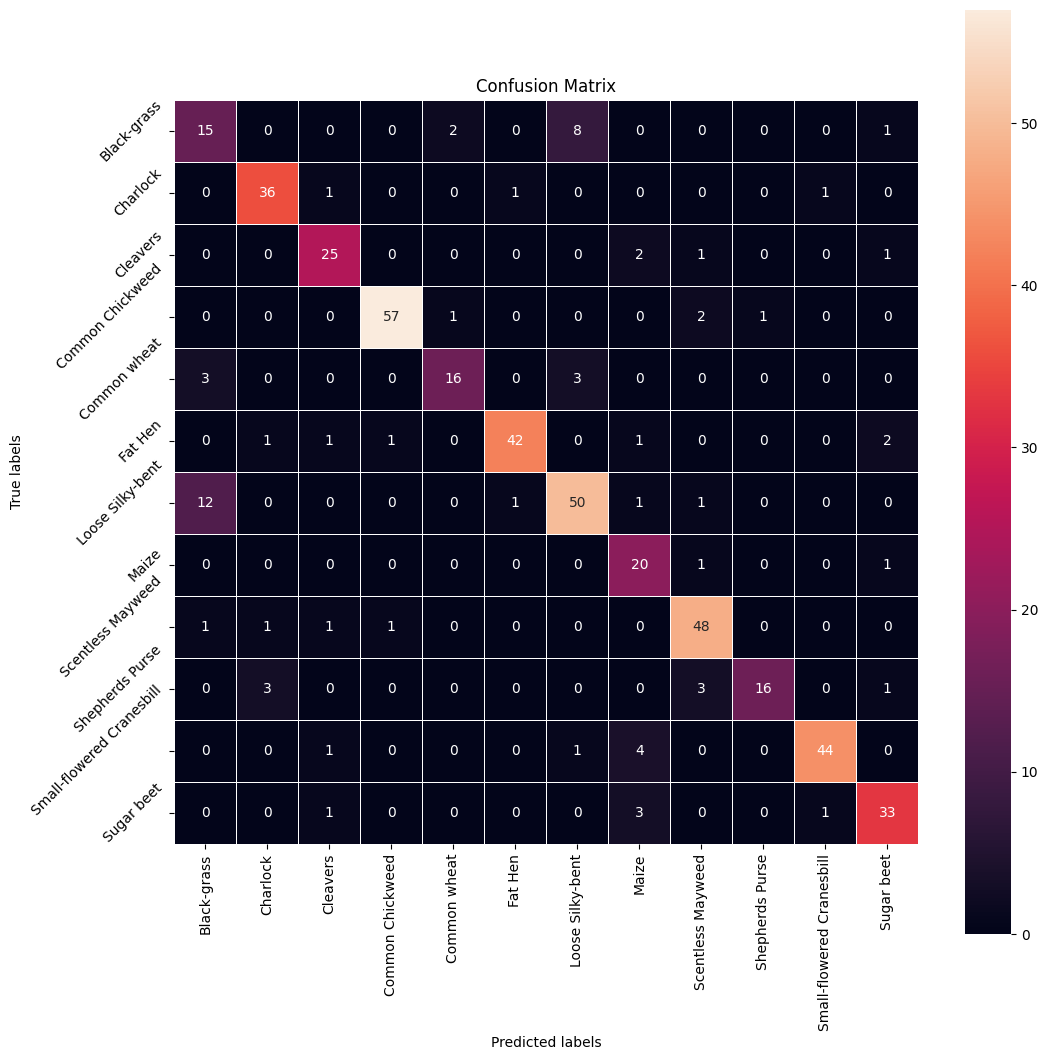

In [42]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=45)
plt.show()

Mis-classifications have reduced significantly across the board!

**Print classification report**

In [43]:
print(classification_report(y_test_arg, y_pred_arg, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.48      0.58      0.53        26
                 Charlock       0.88      0.92      0.90        39
                 Cleavers       0.83      0.86      0.85        29
         Common Chickweed       0.97      0.93      0.95        61
             Common wheat       0.84      0.73      0.78        22
                  Fat Hen       0.95      0.88      0.91        48
         Loose Silky-bent       0.81      0.77      0.79        65
                    Maize       0.65      0.91      0.75        22
        Scentless Mayweed       0.86      0.92      0.89        52
          Shepherds Purse       0.94      0.70      0.80        23
Small-flowered Cranesbill       0.96      0.88      0.92        50
               Sugar beet       0.85      0.87      0.86        38

                 accuracy                           0.85       475
                macro avg       0.83      0.83      0.83    

 Accuracy is 0.85 on the test set and the weighted average F1 score for our this improved model is also 0.85. F1 score for Black grass has doubled wrt model 1: from 0.24 to 0.53. Recall for Common wheat and Shepherd's purse have also improved.

## Final Model

We will select our improved model 2 as it is performing better in all aspects, across all performance measures. Recalls and f1 scores have improved for individual plant categories and overall accuracy has gone up to 85% on test set.

### Visualizing the prediction

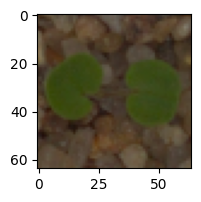

1/1 [==============================] - 0s 459ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


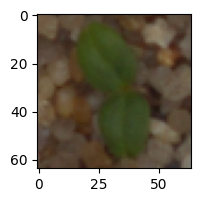

1/1 [==============================] - 0s 117ms/step
Predicted Label ['Cleavers']
True Label Cleavers


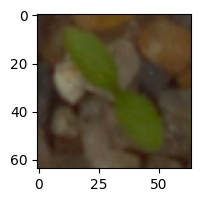

1/1 [==============================] - 0s 62ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


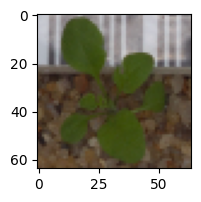

1/1 [==============================] - 0s 114ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [44]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

We can see 1:1 predictions to true labels in these plots.

## Actionable Insights and Business Recommendations

- The dataset with images for 12 different types of plant seedlings is imbalanced. There are 600+ images of the Loose Silky-bent plant on the highest end, compared t0 200 each for Common Wheat and Maize on the lower end. We used data augmentation to control for model overfitting to more frequent types of plant seedlings and reduce misclassifications.
- The default channel of the images was BGR which we converted to RGB for clearer and more realistic visual descriptions.
- We also reduced the image sizes from 128x128 to 64x64 to reduce computation overload and time.
- We built a base CNN-model to predict the plant types, which works quite well with 78% accuracy on test set. CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification.
- We then improved the model performance by adapting the learning rate to reduce loss, increasing test accuracy to 85% and reducing the misclassifications between Black Grass and Loos Silky-bent.
- This model 2 can be used to reduce the manual effort and time in classifying these plant types in agriculture.
- Increasing number of epochs and/or experimenting with the layers in this model can even increase the performance.
- It is recommended to add more images of the less frequent plant types especially Shepherd's purse, Common wheat and Black Grass to reduce the imbalance in the dataset and further improve the model accuracy.
- It is always advisable to have a human-in-the-loop as these predictions get turned into any set of decisions and actions in the field.



_____